In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls "/content/drive/My Drive/Colab Notebooks"

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Estudo/ArquivoTreino.csv")

In [4]:
df.head(10)
#df.describe()
#df.shape

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

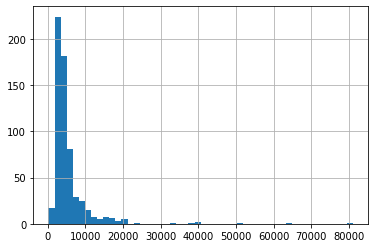

In [6]:
df['ApplicantIncome'].hist(bins=50)

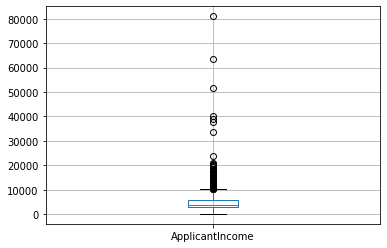

In [7]:
df.boxplot(column='ApplicantIncome')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


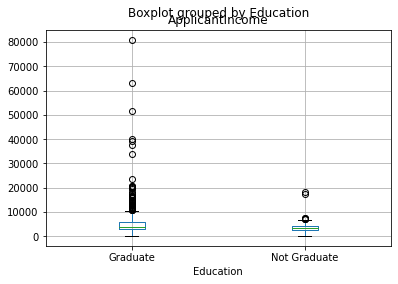

In [8]:
df.boxplot(column='ApplicantIncome', by = 'Education')

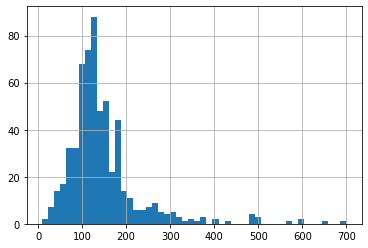

In [9]:
df['LoanAmount'].hist(bins=50)

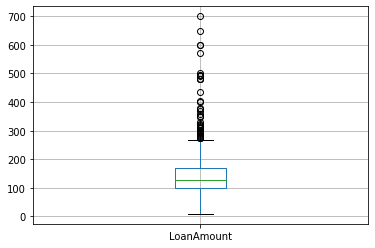

In [10]:
df.boxplot(column='LoanAmount')

In [11]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


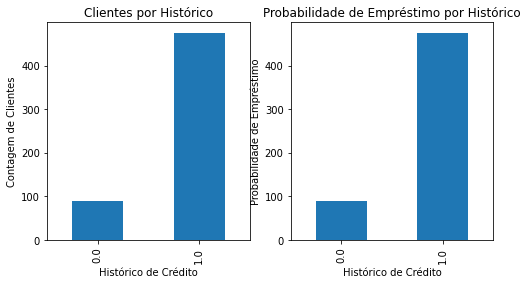

In [12]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Histórico de Crédito')
ax1.set_ylabel('Contagem de Clientes')
ax1.set_title('Clientes por Histórico')
temp1.plot(kind='bar')
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Histórico de Crédito')
ax2.set_ylabel('Probabilidade de Empréstimo')
ax2.set_title('Probabilidade de Empréstimo por Histórico')
temp1.plot(kind = 'bar')

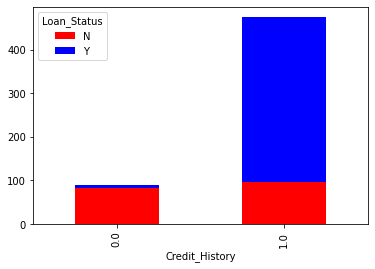

In [13]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status']) 
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [15]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

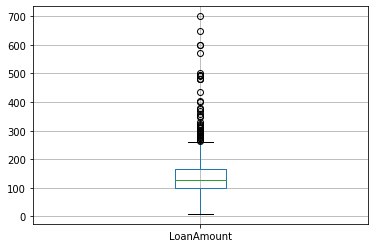

In [16]:
df.boxplot(column='LoanAmount')

In [ ]:
df.boxplot(column='LoanAmount', by=['Education','Self_Employed'])

In [18]:
df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


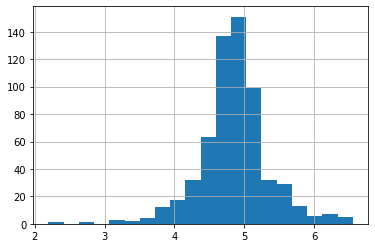

In [20]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

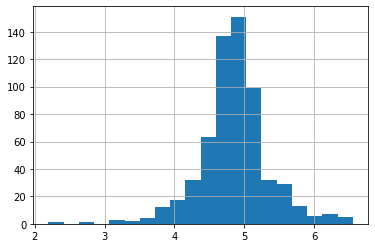

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

**Exploração e Tratamento de Dados**

In [22]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [23]:
df['Gender'].value_counts()
df['Self_Employed'].fillna('Male',inplace=True)

In [24]:
df['Married'].value_counts()
df['Married'].fillna('Yes',inplace=True)

In [25]:
df['Dependents'].value_counts()
df['Dependents'].fillna('Yes',inplace=True)

In [26]:
df['Self_Employed'].value_counts() 
df['Self_Employed'].fillna('No',inplace=True)

In [27]:
df['LoanAmount'].value_counts() 
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [28]:
df['Loan_Amount_Term'].value_counts() 
df['Loan_Amount_Term'].mean()
#df['Loan_Amount_Term'].fillna(360,inplace=True)

342.0

In [29]:
df['Credit_History'].value_counts() 
df['Credit_History'].mean()
#df['Credit_History'].fillna(360,inplace=True)

0.8421985815602837

Criação de nova variavel no modelo

In [ ]:
#Adicionar Renda Total
#ApplicantIncome - #Renda do aplicante
#CoapplicantIncome - #Renda do fiador

**Aprendizado de máquina**

In [30]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
from sklearn.preprocessing import LabelEncoder 
var_mod =['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod: df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [31]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [32]:
#Importa os modelos da biblioteca scikit learn: 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [37]:
#Função para fazer um modelo de classificação para avaliar performance
resultado = []
modelo = []
def classification_model(model, data, predictors, outcome, tipo):
  #Ajusta o modelo: 
  model.fit(data[predictors],data[outcome])
  #Faz previsões nos dados de treino:
  predictions = model.predict(data[predictors])
  #Mostra a acurácia
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Acurácia : %s" % "{0:.3%}".format(accuracy))
  #varResultado = "{0:.3%}".format(accuracy)
  resultado.append(accuracy*100)
  modelo.append(tipo)

  #Realiza validação cruzada k-fold com 5 folds 
  kf = KFold(5,shuffle=False)
  error = [] 
  for train, test in kf.split(data): 
    # Filtra dados de treino
    train_predictors = (data[predictors].iloc[train,:])
    # O alvo que estamos usando para treinar o algoritmo 
    train_target = data[outcome].iloc[train]
    # Treinando o algoritmo com previsores e alvo
    model.fit(train_predictors, train_target)
    #Grava erros de cada loop de validação cruzada 
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print("Score da Validação Cruzada : %s" % "{0:.3%}".format(np.mean(error)))
    #Acerta de novo o modelo para que possa se referir fora da função
    model.fit(data[predictors],data[outcome])


**Regressão Logística**

In [38]:
varTipo = 'RL'
outcome_var = 'Loan_Status'
model = LogisticRegression()
#predictor_var = ['Credit_History']
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,df,predictor_var,outcome_var,'RL')


Acurácia : 80.945%
Score da Validação Cruzada : 80.488%
Score da Validação Cruzada : 78.455%
Score da Validação Cruzada : 79.133%
Score da Validação Cruzada : 80.691%
Score da Validação Cruzada : 80.946%


**Árvore de Decisão**

In [41]:
varTipo = 'DT'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var,varTipo)

Acurácia : 80.945%
Score da Validação Cruzada : 77.236%
Score da Validação Cruzada : 74.390%
Score da Validação Cruzada : 76.152%
Score da Validação Cruzada : 77.642%
Score da Validação Cruzada : 78.179%


In [42]:
#Podemos tentar diferentes combinações de variáveis:
predictor_var = ['Credit_History','Loan_Amount_Term']
classification_model(model, df,predictor_var,outcome_var,varTipo)

Acurácia : 81.270%
Score da Validação Cruzada : 78.862%
Score da Validação Cruzada : 76.829%
Score da Validação Cruzada : 78.320%
Score da Validação Cruzada : 80.081%
Score da Validação Cruzada : 80.295%


**Floresta Aleatória**


In [43]:
varTipo = 'FA'
model = RandomForestClassifier(n_estimators=100)
#predictor_var = ['Gender', 'Married', 'Dependents', 'Education']
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var,varTipo)

Acurácia : 80.945%
Score da Validação Cruzada : 77.236%
Score da Validação Cruzada : 74.390%
Score da Validação Cruzada : 76.152%
Score da Validação Cruzada : 78.252%
Score da Validação Cruzada : 78.503%


In [44]:
#Criar uma série:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History    0.779909
Property_Area     0.091767
Married           0.052314
Self_Employed     0.039291
Education         0.036719
dtype: float64


In [46]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var,varTipo)

Acurácia : 81.922%
Score da Validação Cruzada : 78.862%
Score da Validação Cruzada : 77.236%
Score da Validação Cruzada : 78.591%
Score da Validação Cruzada : 79.878%
Score da Validação Cruzada : 80.624%


In [47]:
outcome_var = 'Loan_Status'
predictor_var = ['Education']

# Regressão Logistica
varTipo = 'RL'
model = LogisticRegression()
classification_model(model,df,predictor_var,outcome_var,varTipo)

# Árvore de decisão
varTipo = 'AD'
model = DecisionTreeClassifier()
classification_model(model, df,predictor_var,outcome_var,varTipo)

#Floresta aleatória
varTipo = 'FA'
model = RandomForestClassifier(n_estimators=100)
classification_model(model, df,predictor_var,outcome_var,varTipo)


Acurácia : 68.730%
Score da Validação Cruzada : 67.480%
Score da Validação Cruzada : 67.886%
Score da Validação Cruzada : 68.835%
Score da Validação Cruzada : 68.902%
Score da Validação Cruzada : 68.729%
Acurácia : 68.730%
Score da Validação Cruzada : 67.480%
Score da Validação Cruzada : 67.886%
Score da Validação Cruzada : 68.835%
Score da Validação Cruzada : 68.902%
Score da Validação Cruzada : 68.729%
Acurácia : 68.730%
Score da Validação Cruzada : 67.480%
Score da Validação Cruzada : 67.886%
Score da Validação Cruzada : 68.835%
Score da Validação Cruzada : 68.902%
Score da Validação Cruzada : 68.729%


In [48]:
dfAnalise = pd.DataFrame({'Tipo':modelo , 'Resultado':resultado})
dfAnalise

,Tipo,Resultado
0,RL,80.944625
1,RL,80.944625
2,DT,80.944625
3,DT,81.270358
4,FA,80.944625
5,FA,81.921824
6,RL,68.729642
7,AD,68.729642
8,FA,68.729642


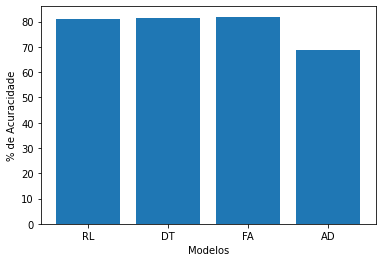

In [49]:
from matplotlib import pyplot as plt

grupos = dfAnalise['Tipo']
valores = dfAnalise['Resultado']
plt.bar(grupos, valores)
plt.ylabel('% de Acuracidade')
plt.xlabel('Modelos')
plt.show()

In [53]:
########
train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Estudo/ArquivoTreino.csv")
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
#categorical_columns = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


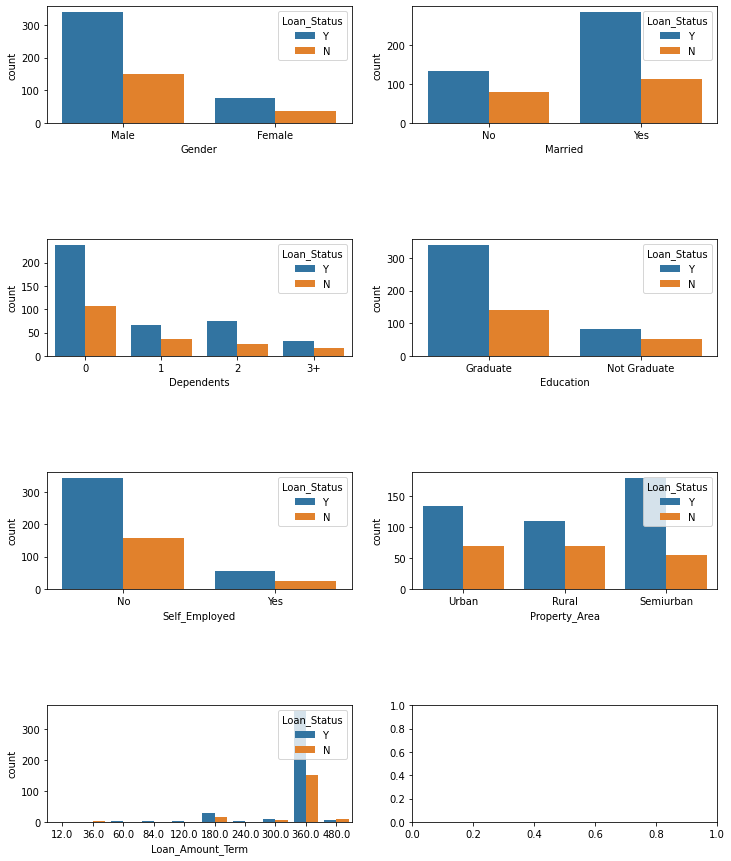

In [54]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(4,2,figsize=(12,15))

for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)